# <center>Performance of Clustering Model</center>
<center>Angeline Karen - 2440035601</center>

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics, datasets

In [233]:
# Loading Iris dataset
df = pd.read_csv('iris.csv')

# Turn 'species' category to numerical 
df["species"] = pd.Categorical(df["species"])
df["species"] = df["species"].cat.codes

Text(0, 0.5, 'Petal Width (cm)')

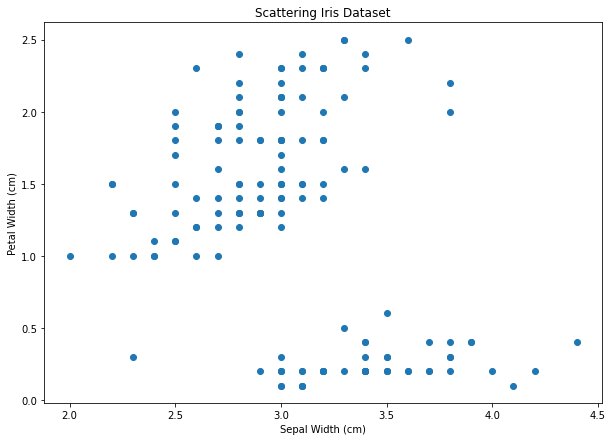

In [234]:
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter our iris dataset (Sepal Width vs Petal Width)
ax.scatter(df['sepal_width'], df['petal_width'])
ax.set_title("Scattering Iris Dataset")
ax.set_xlabel("Sepal Width (cm)")
ax.set_ylabel("Petal Width (cm)")

In [245]:
x = df.loc[:, ['sepal_width', 'petal_width']]
y = df['species']

In [246]:
inertia = []
# k: range of values, say from 1-10
k = range(1, 10)

In [247]:
# Finding the best number of clusters by trying to find the "elbow point"
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

In [248]:
inertia

[114.79233333333336,
 36.50100000000001,
 20.717089831215514,
 16.207957647942116,
 12.267551085317066,
 9.360210076725796,
 8.001490273653046,
 6.938221097615839,
 6.023539565353807]

Text(0, 0.5, 'Inertia Score')

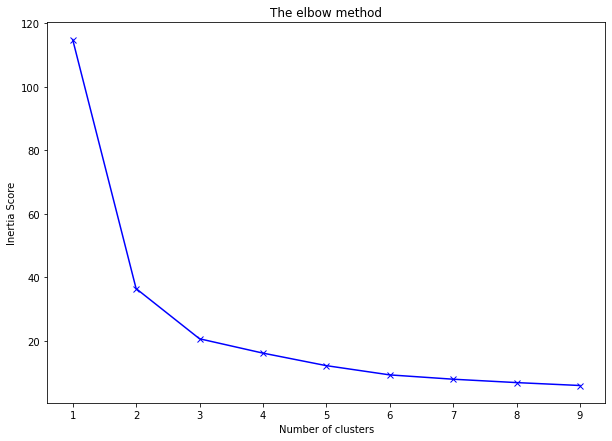

In [250]:
fig, ax2 = plt.subplots(figsize=(10, 7))

ax2.plot(k, inertia,'bx-')
ax2.set_title("The elbow method")
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Inertia Score")

From the graph above, we can confirm that the best number of clusters for our data is 3, since it is the bend of an elbow.

In [240]:
# Now, we can predict using k-means with a number of clusters of 3
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit(x)

centroids = kmeans.cluster_centers_
print(centroids)

[[3.44081633 0.24285714]
 [3.04166667 2.05208333]
 [2.70754717 1.30943396]]


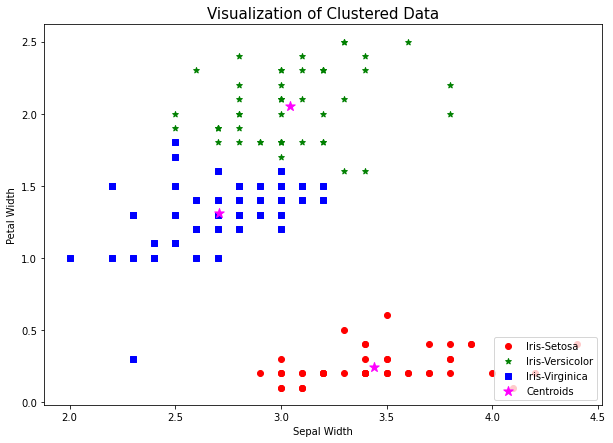

In [241]:
fig, ax3 = plt.subplots(figsize=(10, 7))

# Plotting the results
ax3.scatter(df['sepal_width'][y_kmeans.labels_== 0], df['petal_width'][y_kmeans.labels_== 0],
            color='red', marker='o', label='Iris-Setosa')
ax3.scatter(df['sepal_width'][y_kmeans.labels_== 1], df['petal_width'][y_kmeans.labels_== 1],
            color='green', marker='*', label='Iris-Versicolor')
ax3.scatter(df['sepal_width'][y_kmeans.labels_== 2], df['petal_width'][y_kmeans.labels_== 2],
            color='blue', marker='s', label='Iris-Virginica')

ax3.scatter(y_kmeans.cluster_centers_[:,0], y_kmeans.cluster_centers_[:,1], c='magenta', s=100, marker='*', label='Centroids')
ax3.set_title('Visualization of Clustered Data', fontsize=15)
ax3.set_xlabel('Sepal Width')
ax3.set_ylabel('Petal Width')
ax3.legend(loc='lower right')

We can conclude that the best number of clusters for the dataset is 3. From the iris dataset, we know that it has 3 number of categories, which then we can infer that the number of clusters for the dataset is 3. However, the machine cannot see that and so we can determine the best number of clusters by finding the elbow point from elbow method. Here, I compare "sepal width" and "petal width". We can find the "'elbow point" by iterate the values of k ranging from 1 to 10 (1-9), building and fitting our model x, and calculate the values of inertia for each value of k. We then append it to an array and plot it. Therefore, we can get the graph. Therefore, we can infer from the graph that the best number of clusters for the dataset is 3, seen from the bend of an elbow (elbow point).